<h1><center>Subreddit Classifier</center></h1>
My GitHub Repository for this project can be accessed here: (https://github.com/AmanBrar11/subreddit-post-classifier)

## Introduction

Welcome to my Jupyter Notebook for my Subreddit Post Classifier project. The goal of this project is to build a model to process and analyze a massive [dataset](https://github.com/linanqiu/reddit-dataset) containing over 260,000 posts and comments from various subreddits, which can then use this data to make predictions about where a given post or comment is from. These were all submissions by users to Reddit.com scraped directly from the website by the creator of the linked GitHub repository in 2016. By applying machine learning techniques, specifically a Random Forest Classifier, we are able to predict the subreddit category for given text posts with high accuracy.

## Purpose

The purpose of this project is twofold: firstly, to demonstrate the power of Natural Language Processing (NLP) and machine learning in classifying text data, and secondly, to provide a practical tool that can automatically categorize Reddit posts. This has numerous applications, from content filtering and recommendation systems to social media monitoring and data analysis.In the age of information overload, the ability to automatically sort and classify vast amounts of text data is invaluable. Not only does it aid in managing the data, but it also enables the extraction of insights and trends from specific communities. This project showcases how a relatively simple machine learning model can provide a high degree of accuracy in text classification tasks, paving the way for more complex and nuanced data analysis.

## Real-World Applications

This classifier can be employed in various real-world scenarios such as:

- **Content Moderation:** Automatically flagging or categorizing posts for review to maintain community standards.
- **Marketing Insights:** Analyzing customer sentiment and interests across different subreddit communities for targeted marketing.
- **Trend Analysis:** Monitoring the popularity and discussion topics within communities over time to identify trends.
- **Custom Feeds:** Creating personalized content feeds for users based on their interests.


## Data
Once again here is the direct link (https://github.com/linanqiu/reddit-dataset) to the github repository from which this data was sourced from, it belongs to Linan Qiu and is under an MIT License. The source contains 51 seperate csv dataset, one for each subreddit. This combined for over 260,000 posts and comments throughout the entire dataset. The CSVs are described as having the following columns:
- `text`: Text of the comment / thread
- `id`: Unique reddit id for the comment / thread
- `subreddit`: Subreddit that the comment / thread belongs to
- `meta`: Metareddit that the comment / thread belongs to. Subreddits belong to metareddits. A subreddit can be `leagueoflegends`. The metareddit for that subreddit would be `gaming`, which can also include the subreddit `dota2`
- `time`: UNIX timestamp of the comment / thread
- `author`: Username of the author of the comment / thread
- `ups`: Number of upvotes the comment / thread received
- `downs`: Number of downvotes the comment / thread received
- `authorlinkkarma`: The author's link karma. [What is Link Karma?](https://www.reddit.com/r/NoStupidQuestions/comments/2idfhk/what_is_link_karma/)
- `authorkarma`: The author's karma. [Reddit FAQ](https://www.reddit.com/wiki/faq) explaining karma.
- `authorisgold`: Boolean indicator for the gold status of the user. `1` for gold users, `0` for non-gold (normal) users. [Reddit FAQ](https://www.reddit.com/wiki/faq) explaining gold status.

## Data Cleaning
1. Since all the datasets were their own csv I started out by combining them all into one.
2. Next I started cleaning the text getting rid of special characters and numbers
3. Then I utilized a corpus of stop words to remove insignificant and common words from the data
4. After that I stemmed the remaining words and got rid of any single letter tokens. 
5. Lastly, I replaced any empty strings with NaN and then dropped those rows.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

C:\Users\amans\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\amans\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# importing data from a public github repo containing reddit posts from 50 subreddits
base_url = 'https://raw.githubusercontent.com/linanqiu/reddit-dataset/master/'

file_names = [
    'entertainment_anime.csv',
    'entertainment_comicbooks.csv',
    'entertainment_harrypotter.csv',
    'entertainment_movies.csv',
    'entertainment_music.csv',
    'entertainment_starwars.csv',
    'gaming_dota2.csv',
    'gaming_gaming.csv',
    'gaming_leagueoflegends.csv',
    'gaming_minecraft.csv',
    'gaming_pokemon.csv',
    'gaming_skyrim.csv',
    'gaming_starcraft.csv',
    'gaming_tf2.csv',
    'humor_adviceanimals.csv',
    'humor_circlejerk.csv',
    'humor_facepalm.csv',
    'humor_funny.csv',
    'humor_imgoingtohellforthis.csv',
    'humor_jokes.csv',
    'learning_askhistorians.csv',
    'learning_askscience.csv',
    'learning_explainlikeimfive.csv',
    'learning_science.csv',
    'learning_space.csv',
    'learning_todayilearned.csv',
    'learning_youshouldknow.csv',
    'lifestyle_drunk.csv',
    'lifestyle_food.csv',
    'lifestyle_frugal.csv',
    'lifestyle_guns.csv',
    'lifestyle_lifehacks.csv',
    'lifestyle_motorcycles.csv',
    'lifestyle_progresspics.csv',
    'lifestyle_sex.csv',
    'news_conservative.csv',
    'news_conspiracy.csv',
    'news_libertarian.csv',
    'news_news.csv',
    'news_offbeat.csv',
    'news_politics.csv',
    'news_truereddit.csv',
    'news_worldnews.csv',
    'television_breakingbad.csv',
    'television_community.csv',
    'television_doctorwho.csv',
    'television_gameofthrones.csv',
    'television_himym.csv',
    'television_mylittlepony.csv',
    'television_startrek.csv',
    'television_thewalkingdead.csv',
]

dataframes = []
for file_name in file_names:
    # Combine the base URL with the file name
    file_url = f'{base_url}{file_name}'
    df = pd.read_csv(file_url)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,NaN,0,1,2,3,4.0,5,6.0,7.0,8.0,9.0,10.0
1,1,0.0,because she s the worst,d02u69l,anime,entertainment,1455683054.0,Redire77,7.0,0.0,352.0,14017.0,0.0
2,2,1.0,i am referring to this http iimgurcom5sryl...,466ijy,anime,entertainment,1455682823.0,shiba_arata,0.0,0.0,1.0,20.0,0.0
3,3,2.0,cheating but zoldycks must have a great time a...,d02g879,anime,entertainment,1455661236.0,ShaKing807,6.0,0.0,1308.0,62021.0,1.0
4,4,3.0,kurosaki ichigo http images5fanpopcomimag...,d02v88z,anime,entertainment,1455684994.0,Tf2idlingftw,2.0,0.0,4156.0,1021.0,0.0


In [3]:
# restructing the dataframe to get ready for preprocessing
df = combined_df[['1','3']].astype(str)
df.columns = ['text', 'subreddit']
df = df.iloc[1:, :]

df.head()

,text,subreddit
1,because she s the worst,anime
2,i am referring to this http iimgurcom5sryl...,anime
3,cheating but zoldycks must have a great time a...,anime
4,kurosaki ichigo http images5fanpopcomimag...,anime
5,there are a shit ton of koutarous but the pre...,anime


In [4]:
# cleaning the text getting rid of special characters and numbers
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

df['text'] = df['text'].apply(clean_text)

In [5]:
# removing common/insignificant english words
df['text'] = df['text'].str.lower()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)

In [12]:
# stemming and getting rid of short tokens
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_short_tokens(text):
    return " ".join([word for word in text.split() if len(word) > 3])

df['text'] = df['text'].apply(lemmatize_text)
df['text'] = df['text'].apply(remove_short_tokens)

In [13]:
# Replace empty strings with NaN
df.replace(' ', pd.NA, inplace=True)
df.dropna(inplace=True)

## Exploratory Data Analysis

In the exploratory data analysis section, we observe a notable reduction in the number of rows. This decrease is primarily due to the removal of less significant words and short tokens, which significantly streamlined the dataset.

The histogram reveals that the most prevalent subreddits in our dataset include categories such as gaming, lifestyle, humor, news, and television. These subreddits play a pivotal role in shaping the classifier, indicating their relative importance in the analysis. Additionally, the analysis sheds light on the most frequent tokens present in the dataset. Interestingly, these tokens are not standard English words. This might be an outcome of the data processing techniques used, or it could indicate the presence of common word roots from non-English languages, considering our filtering was focused on removing only common English terms.

In [14]:
df.shape

(1905833, 2)

In [15]:
df.head()

,text,subreddit
1,becauseshestheworst,anime
2,iamreferringtothishttpiimgurcomsrylmijpgdoesit...,anime
3,cheatingbutzoldycksmusthaveagreattimeatthanksg...,anime
4,kurosakiichigohttpimagesfanpopcomimagephotosic...,anime
5,thereareashittonofkoutarousbutthepresenceofone...,anime


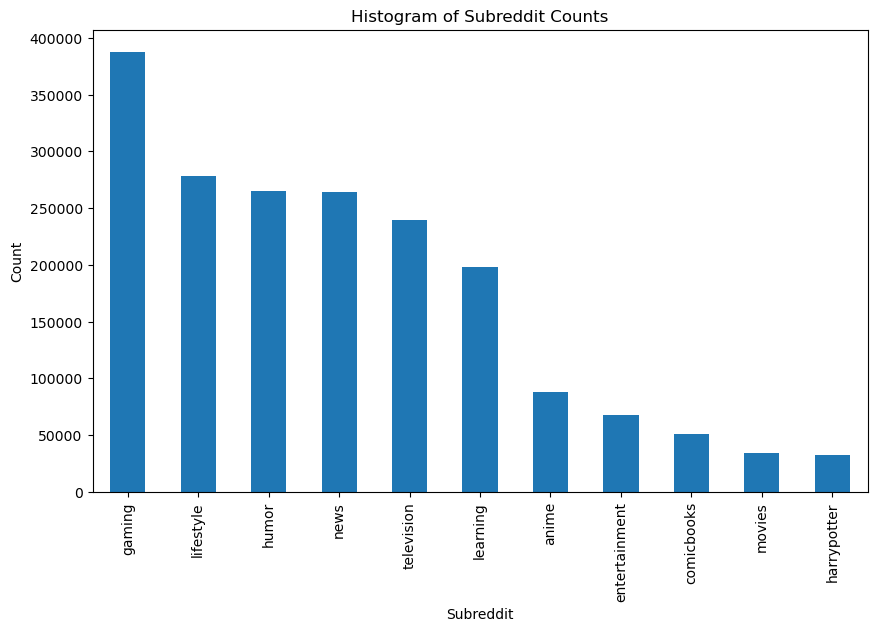

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the occurrences of each subreddit
subreddit_counts = df['subreddit'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
subreddit_counts.plot(kind='bar')
plt.title('Histogram of Subreddit Counts')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()


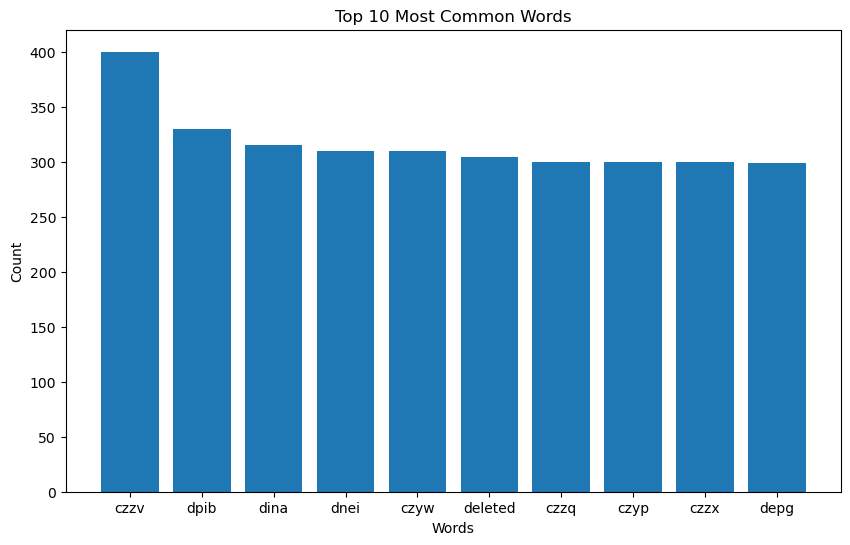

In [17]:
from collections import Counter
word_counts = Counter(df['text'])

# Getting the top 10 most common words
top_10_words = word_counts.most_common(10)

# Preparing data for plotting
words, counts = zip(*top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Common Words')
plt.show()

## Models

In this section I test out four differnet models to see which is the best. I have to used 10% of the dataset because using the whole dataset would take too long looping thorough the model then the following grid search. The selected models for this examination were Naive Bayes, SVM (Support Vector Machine), Logistic Regression, and Random Forest. These models were chosen for their robustness and efficacy in handling datasets with a high dimensionality of features, which is a common scenario in complex classification tasks. Each of these models brings unique strengths to the table:

Naive Bayes: Known for its simplicity and speed, especially in text classification and scenarios where the assumption of feature independence holds.

SVM: Highly effective in high-dimensional spaces and versatile due to its kernel trick, making it suitable for non-linear classification.

Logistic Regression: A go-to algorithm for binary classification problems, providing a probabilistic framework and interpretability.

Random Forest: An ensemble method that excels in handling overfitting, capable of managing large datasets with higher dimensionality without sacrificing model accuracy.

After a thorough assessment based on accuracy, the Random Forest model emerged as the superior choice. To optimize its performance, I conducted a grid search to determine the best hyperparameters, which revealed that a max_depth of 20 and n_estimators (number of trees in the forest) of 200 were ideal. These parameters strike a balance between model complexity and the risk of overfitting, leveraging the strength of Random Forest in creating an ensemble of deep trees without being overly specific to the training data.

Equipped with these optimized parameters, I proceeded to train the Random Forest model on the entire dataset. This approach aimed to leverage the full breadth of available data, thereby enhancing the robustness of the model. By harnessing the entire dataset, the model benefits from a more comprehensive learning process, potentially capturing subtler patterns and relationships within the data that might have been overlooked in a smaller sample

In [18]:
# Using a smaller sample dataset since the orignal take too long
sampled_df = df.sample(frac=0.1)

In [19]:
# spltting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(sampled_df['text'], sampled_df['subreddit'], test_size=0.2, random_state=42)

In [20]:
# converting text data to numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}
accuracy_scores = {}

# Loop through each model and train on data
for model_name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

# Find the model with the best accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

print("Best Model: "+ str(best_model) + " Accuracy: " + str(best_accuracy))

Best Model: Random Forest Accuracy: 0.81758237508908235


In [23]:
# further parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30]
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
CV_clf.fit(X_train_vect, y_train)
print(CV_clf.best_params_)

{'max_depth': 20, 'n_estimators': 200}


In [24]:
# spltting data into train/test sets using the whole dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['subreddit'], test_size=0.2, random_state=42)

In [25]:
# converting text data to numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [28]:
# training a random forest classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
clf.fit(X_train_vect, y_train)
# making predictions based on classifier
y_pred = clf.predict(X_test_vect)

## Results and Analysis

Upon training the Random Forest Classifier, it was used to make predictions on the X_test dataset. The  performance metrics were analyzed, including accuracy, precision, recall, and the F1 score. The model showcased a high accuracy of 0.89, indicative of its overall effectiveness in correctly classifying instances. However, a more nuanced understanding of its performance emerged upon examining the precision (0.72) and recall (0.93) scores, alongside an F1 score of 0.82.

The significantly higher recall compared to precision suggests that the model is exceptionally adept at identifying most of the relevant cases (true positives). A recall of 0.93 means the classifier successfully captures 93% of the actual positive instances. However, the lower precision score of 0.72 indicates that among the instances it classifies as positive, only 72% are actually positive. This discrepancy could imply a tendency of the model to have a higher rate of false positives – predicting some negative instances as positive.

The F1 score, being a reasonable mean of precision and recall, provides a balanced view of the model's performance. An F1 score of 0.82 indicates that the model achieves a decent balance between recall and precision, despite the disparity between them.

In summary, while the model demonstrates high accuracy and recall, indicating its capability to identify most positive cases, the relatively lower precision suggests room for improvement in reducing false positives. This analysis underscores the importance of considering multiple metrics beyond accuracy to gain a comprehensive understanding of a classifier’s performance, particularly in the context of the problem's specific needs and constraints.

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
# printing summary stats
print('Random Forest Summary:')
print('-------------------------------------')
# getting accuracy of my classifier

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# getting the precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Random Forest Summary:
-------------------------------------
Accuracy: 0.89456268147961113
Precision: 0.71891238012490584
Recall: 0.93420535082352344
F1 Score: 0.81829105711209472


In [41]:
# function for applying the classifier to new text posts
def predict_subreddit(text):
    text = clean_text(text)  # Clean the new text
    text_vect = vectorizer.transform([text])  # Vectorize the new text
    prediction = clf.predict(text_vect)  # Predict the subreddit
    return prediction[0]

In [42]:
print(predict_subreddit("Here's a new Reddit post text to classify"))

learning


## Conclusion and Discussion
A few challenges that I encountered during this project was dealing with an extremely large dataset along with complex machine learning models. To combat this I used a smaller sample size to do some of the analysis, but this still involved a lot of waiting. Overall, this project demonstrates a lot of potential. By successfully classifying Reddit posts into their respective subreddits, this project not only highlights the effectiveness of Natural Language Processing in content classification but also exhibits its application in broader digital content management and analysis. Such a classifier can be instrumental in areas like content moderation, trend identification, and user engagement analysis, offering invaluable tools for both social media platforms and marketers. The insights gained from this project underscore the transformative impact of machine learning in interpreting and organizing vast amounts of data in the digital age.